# **Semana 3 do Challange**

Após a investigação da distribuição da variável target e análise das relações e correlações entre as variáveis na semana anterior, a empresa trouxe mais uma demana para a terceira semana.

Essa nova demanda é a respeito de um modelo de machine learning capaz de prever se o cliente irá evadir ou não. Para isso, serão utilizados os dados tratados após a segunda semana.

Antes da criação do modelo, serão efetuadas etapas de pré-processamento de dados como encoding e balanceamento. Após isso, serão criados 3 modelos de machine learning que serão comparados entre si utilizando-se de métricas estatísticas e visuais. Após a decisão do melhor modelo, este será otimizado e entregue para a empresa.

Além da entrega do modelo de machine learning, também serão entregue os dados dos clientes que estavam com dados de Evasão na coluna, como definido na primeira semana.

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'D:\OneDrive\Pessoal\Material de Estudo\ALURA\Desafios\Alura_Challenge_Data_Science\Semana 01'
file_name = '/dados limpos.csv'
file_path = path + file_name

dados = pd.read_csv(file_path)
dados.head()

,ID_cliente,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Servico_de_internet,...,Protecao_dipositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Metodo_de_pagamento,Total_servico_dia,Total_servico_mes,Total_gasto
0,0002-ORFBO,Nao,Mulher,Nao,Sim,Sim,9,Sim,Nao,DSL,...,Nao,Sim,Sim,Nao,Anual,Sim,Cheque,2.19,65.6,593.30
1,0003-MKNFE,Nao,Homem,Nao,Nao,Nao,9,Sim,Sim,DSL,...,Nao,Nao,Nao,Sim,Mensal,Nao,Cheque,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Homem,Nao,Nao,Nao,4,Sim,Nao,Fiber optic,...,Sim,Nao,Nao,Nao,Mensal,Sim,Cheque eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Homem,Sim,Sim,Nao,13,Sim,Nao,Fiber optic,...,Sim,Nao,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Mulher,Sim,Sim,Nao,3,Sim,Nao,Fiber optic,...,Nao,Sim,Sim,Nao,Mensal,Sim,Cheque,2.80,83.9,267.40


A coluna `ID_cliente` possui apenas valores únicos. Então podemos retira-la, já que não terá utilidade para nosso modelo.

In [3]:
dados.drop(columns='ID_cliente', inplace = True)

## **Verificando a existencia de desbalancemento nos dados**

In [4]:
dados.Evasao.value_counts()

Nao    5174
Sim    1869
Name: Evasao, dtype: int64

In [5]:
import plotly.express as px

px.histogram(dados, x ='Evasao', title = 'Contagem de Evasões', template = 'simple_white', text_auto=True, color = 'Evasao',  
                color_discrete_map={ # replaces default color mapping by value
                "Nao": "blue", "Sim": "red"
                },
                )

**A variável Target está desbalanceada.** 

Este desbalanceamento pode acabar fazendo com que o modelo desenvolvido futuramente seja vítima do **Paradoxo da Acurácia**. Para isso mais para frente vamos lidar com esse problema utilizando o **Oversampling**, ou, o **Undersampling**, que são dois métodos de balancemantos de dados. 

Outros dois approaches interessantes a serem estudados futuramente são: Cost-Sensitive Learning e Recognition-based learning

**Paradoxo da Acurácia:** O modelo respondera muito bem a entradas para as classes majoritárias, mas terá um desempenho inferior para as minoriárias. O que pela desproporcionalidade causará uma alta acurácia. Gerando uma situação contraditória na qual uma acurácia elevada em seu modelo de classificação pode evidenciar uma falha do seu próprio modelo em realizar predições de fato significativas

## **Aplicando enconding nos dados**

Como modelos de machine learning não sabem computar dados em texto, apenas em números, será necessário alterar os valores em texto das colunas categóricas e atribuir valores numéricos para os mesmos. O nome dessa técnica é encoding.



### **Enconding Binário**

Nas análises da primeira semana, foi percebido que algumas colunas possuem apenas 2 valores: Sim e Não. Para esse projeto, os valores serão substituidos por 1, para Sim e 0 para Não. A coluna Genero receberá valores 0 e 1 para Homens e Mulheres respectivamente.

Além disso as colunas filhas da coluna de serviço de telefone e serviço de internet possuiam 3 classes (Sim, Não e Sem servico de telefone ou Sem servico de internet). 

Devemos alterar esses valores para 0 como eles representam a não adoção do serviço de telefone ou a não adoção do serviço de internet respectivamente.

In [6]:
dict_yes_no = {'Sim' : '1' , 'Nao' : '0', 'Sem servico de telefone' : '0' , 'Sem servico de internet' : '0'}

colunas_yes_no = ['Evasao','Cidadao_Senior', 'Parceiro','Dependentes', 'Servico_de_telefone','Linhas_multiplas',
                'Segurnaca_online', 'Backup_online', 'Protecao_dipositivo',
                'Suporte_tecnico','Streaming_TV','Streaming_filmes','Fatura_online']

for coluna in colunas_yes_no:
    dados[coluna].replace(dict_yes_no, inplace=True)

In [7]:
mapa = {'Mulher': 1, 'Homem': 0}

dados['Genero'].replace(mapa, inplace = True)

dados.head()

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Servico_de_internet,Segurnaca_online,...,Protecao_dipositivo,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Metodo_de_pagamento,Total_servico_dia,Total_servico_mes,Total_gasto
0,0,1,0,1,1,9,1,0,DSL,0,...,0,1,1,0,Anual,1,Cheque,2.19,65.6,593.30
1,0,0,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Mensal,0,Cheque,2.00,59.9,542.40
2,1,0,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Mensal,1,Cheque eletrônico,2.46,73.9,280.85
3,1,0,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Mensal,1,Cheque eletrônico,3.27,98.0,1237.85
4,1,1,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Mensal,1,Cheque,2.80,83.9,267.40


### **Label Enconding e One Hot Enconding**

Para as outras variáveis categóricas do sistema, vai ser utilizado outro método. Existem diversas abordagens diferentes, porém existem 2 que são mais utilizadas no mercado: Label Encoding e One-Hot Encoding.

- **Label Enconding:** Você renomeia as classes com valores numéricos de 1 a n sendo o número de classes.
- **One hot Encoding:** Cria colunas adicionais com base no número de valores exclusivos no coluna categórica

[Site para mais informações](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)

A técnica escolhida depende geralmente do seu conjunto de dados e do modelo que você deseja aplicar. 

Por a coluna ``Tipo_de_Contrato`` ser uma variavel ordinal, iremos utilizar o Label Enconding.

#### **Label Enconding**

Para efetuar o método Label Enconding utilizaremos a Biblioteca [Sklearn](https://scikit-learn.org/stable/) que possui o método [ordinal_enconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder). Com esse método conseguimos ordenar as variáveis atribuindo uma lista, sendo a primeira variável classificada como 0, a segunda como 1 e assim por diante.

In [8]:
from sklearn import preprocessing

ordem_tipo_contrato = ['Mensal', 'Bienal', 'Anual']

ordinal_enconder = preprocessing.OrdinalEncoder(categories = [ordem_tipo_contrato])

dados['Tipo_de_contrato'] = ordinal_enconder.fit_transform(dados[['Tipo_de_contrato']])

#### **One Hot Enconding**

Já para a coluna ``Servico_de_internet`` e ``Metodo_de_pagamento`` serem apenas 2 colunas e por não serem variávies ordinais, utilizaremos a técnica One hot Econding.

Para efetuar o método de One Hot Encoding dos dados, será usada a biblioteca [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) com seu método [.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) que irá criar as colunas para cada valor exclusivo de cada coluna categorica. O método, ao aplicar o encoding, já elimina as colunas categóricas do sistema.

In [9]:
dados = pd.get_dummies(data = dados, columns=['Servico_de_internet','Metodo_de_pagamento'])
dados.head()

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,...,Total_servico_dia,Total_servico_mes,Total_gasto,Servico_de_internet_DSL,Servico_de_internet_Fiber optic,Servico_de_internet_Nao,Metodo_de_pagamento_Cartão de crédito automático,Metodo_de_pagamento_Cheque,Metodo_de_pagamento_Cheque eletrônico,Metodo_de_pagamento_Transferência bancária automático
0,0,1,0,1,1,9,1,0,0,1,...,2.19,65.6,593.30,1,0,0,0,1,0,0
1,0,0,0,0,0,9,1,1,0,0,...,2.00,59.9,542.40,1,0,0,0,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,2.46,73.9,280.85,0,1,0,0,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,3.27,98.0,1237.85,0,1,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,2.80,83.9,267.40,0,1,0,0,1,0,0


In [10]:
print('Antes tinhamos 21 colunas, agora temos %d' % (dados.shape[1]))

Antes tinhamos 21 colunas, agora temos 26


A técnica One hot Enconding pode resultar em multicolinearidade, que é quando há dependencia entre as variáveis independentes. Isso pode ser um problema em sistemas que utilizam a regressão.

Para verificar a ocorrência ou não desse fator, vamos utilizar uma técnica estatistica chamada de [variance inflation factor (VIF)](https://www.investopedia.com/terms/v/variance-inflation-factor.asp).

Antes de calcular o VIF devemos mudar o tipo das colunas para númerico.

In [11]:
tipo_colunas = dados.dtypes.reset_index()
colunas_object = tipo_colunas[tipo_colunas[0] == 'object']
lista_colunas_object = list(colunas_object['index'])
lista_colunas_object

['Evasao',
 'Cidadao_Senior',
 'Parceiro',
 'Dependentes',
 'Servico_de_telefone',
 'Linhas_multiplas',
 'Segurnaca_online',
 'Backup_online',
 'Protecao_dipositivo',
 'Suporte_tecnico',
 'Streaming_TV',
 'Streaming_filmes',
 'Fatura_online']

In [12]:
for coluna in lista_colunas_object:
    dados[coluna] = pd.to_numeric(dados[coluna] , errors='coerce')

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Evasao                                                 7043 non-null   int64  
 1   Genero                                                 7043 non-null   int64  
 2   Cidadao_Senior                                         7043 non-null   int64  
 3   Parceiro                                               7043 non-null   int64  
 4   Dependentes                                            7043 non-null   int64  
 5   Tempo_de_contrato                                      7043 non-null   int64  
 6   Servico_de_telefone                                    7043 non-null   int64  
 7   Linhas_multiplas                                       7043 non-null   int64  
 8   Segurnaca_online                                

Calculando o VIF

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
 # the independent variables set
X = dados.drop(columns = 'Evasao')
  
# VIF dadosframe
vif_dados = pd.DataFrame()
vif_dados["feature"] = X.columns
  
# calculating VIF for each feature
vif_dados["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_dados)

                                              feature           VIF
0                                              Genero  1.002358e+00
1                                      Cidadao_Senior  1.150878e+00
2                                            Parceiro  1.463969e+00
3                                         Dependentes  1.380632e+00
4                                   Tempo_de_contrato  6.636049e+00
5                                 Servico_de_telefone  3.486107e+01
6                                    Linhas_multiplas  7.274090e+00
7                                    Segurnaca_online  6.324672e+00
8                                       Backup_online  6.782956e+00
9                                 Protecao_dipositivo  6.911729e+00
10                                    Suporte_tecnico  6.422809e+00
11                                       Streaming_TV  2.405234e+01
12                                   Streaming_filmes  2.410413e+01
13                                   Tipo_de_con

c:\Users\ferna\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning:

divide by zero encountered in double_scalars



O valor válido para VIF varia de 1 a infinito. Uma regra prática para interpretar os valores VIF é:

- **VIF < 1:** As características não são correlacionadas

- **1 < VIF < 5:** As características são moderadamente correlacionados

- **VIF > 5:** As características são altamente correlacionados

- **VIF > 10:** Alta correlação entre as características. Motivo de preocupação

Para 'consertar' os valores VIF em nossos dados as respectivas colunas foram removidas da análise por as principais causadoras do problema da multicolinearidade

In [15]:
dados_original = dados.copy()

dados.drop(columns = ['Servico_de_internet_Nao', 'Total_servico_dia', 'Total_servico_mes', 'Total_gasto', 'Metodo_de_pagamento_Cheque eletrônico'], inplace = True)

In [16]:
 # the independent variables set
X = dados.drop(columns = 'Evasao')
  
# VIF dadosframe
vif_dados = pd.DataFrame()
vif_dados["feature"] = X.columns
  
# calculating VIF for each feature
vif_dados["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_dados)

                                              feature       VIF
0                                              Genero  1.914712
1                                      Cidadao_Senior  1.364152
2                                            Parceiro  2.820916
3                                         Dependentes  1.950269
4                                   Tempo_de_contrato  5.814249
5                                 Servico_de_telefone  7.017350
6                                    Linhas_multiplas  2.404808
7                                    Segurnaca_online  1.934044
8                                       Backup_online  2.082107
9                                 Protecao_dipositivo  2.239443
10                                    Suporte_tecnico  2.006101
11                                       Streaming_TV  2.638289
12                                   Streaming_filmes  2.667115
13                                   Tipo_de_contrato  2.505263
14                                      

## **Balanceando os dados**

Existem dois métodos para lidar com dados balanceados:

- **Undersampling:** Consiste em deletar os dados da classe majoritária
- **Oversampling:** Consiste em duplicar dados da classe minoritária 

Tendo em vista que não possuimos muitos dados em nossa base de dados, utilizaremos o método de **Oversampling**. Mais especificamente a técnica [SMOTE](https://acervolima.com/ml-manipulacao-de-dados-desequilibrados-com-smote-e-algoritmo-de-quase-perda-em-python/#:~:text=SMOTE%20(t%C3%A9cnica%20de%20sobreamostragem%20minorit%C3%A1ria,classes%20minorit%C3%A1rias%2C%20replicando%2Dos.)

In [17]:
from imblearn.over_sampling import SMOTE

SEED = 20

smote = SMOTE(random_state=SEED)

In [18]:
x = dados.drop('Evasao', axis=1)
y = dados['Evasao']

x_resampled, y_resampled = smote.fit_resample(x,y)

dados_balanceados = pd.concat([y_resampled, x_resampled], axis=1)
dados_balanceados

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,...,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Servico_de_internet_DSL,Servico_de_internet_Fiber optic,Metodo_de_pagamento_Cartão de crédito automático,Metodo_de_pagamento_Cheque,Metodo_de_pagamento_Transferência bancária automático
0,0,1,0,1,1,9,1,0,0,1,...,1,1,0,2.0,1,1,0,0,1,0
1,0,0,0,0,0,9,1,1,0,0,...,0,0,1,0.0,0,1,0,0,1,0
2,1,0,0,0,0,4,1,0,0,0,...,0,0,0,0.0,1,0,1,0,0,0
3,1,0,1,1,0,13,1,0,0,1,...,0,1,1,0.0,1,0,1,0,0,0
4,1,1,1,1,0,3,1,0,0,0,...,1,1,0,0.0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0.0,0,1,0,0,1,0
10344,1,0,0,0,0,2,1,1,0,1,...,0,0,0,0.0,1,0,1,0,0,0
10345,1,1,0,0,1,4,1,1,0,1,...,0,0,0,0.0,0,0,1,0,0,0
10346,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0.0,1,1,0,0,0,0


In [19]:
dados_balanceados.Evasao.value_counts()

0    5174
1    5174
Name: Evasao, dtype: int64

Agora temos a mesma quantidade de dados de Evasao e de não Evasao. Ou seja, os dados foram balanceados

## **Normalizando os dados Númericos**

A normalização de dados é necessária para as colunas numéricas, pois há uma diferença em grandezas entre elas. Essa etapa [melhora a performance e a estabilidade do modelo treinado](https://developers.google.com/machine-learning/data-prep/transform/normalization).

Para a normalização dessa base de dados será utilizada a técnica de escala linear. Os valores presentes nas colunas serão escalonados para valores entre 0 e 1, com base nos valores máximo e mínimo das colunas.

A normalização altera os valores numéricos para que fiquem mais próximos uns dos outros, porém não altera as características de correlação e distribuição das variáveis.

In [20]:
numericas = ['Tempo_de_contrato']

for coluna in numericas:

    minimo = dados_balanceados[coluna].min()
    maximo = dados_balanceados[coluna].max()

    dados_balanceados[coluna] = (dados_balanceados[coluna] - minimo)/(maximo-minimo)

dados_balanceados.head()

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,...,Suporte_tecnico,Streaming_TV,Streaming_filmes,Tipo_de_contrato,Fatura_online,Servico_de_internet_DSL,Servico_de_internet_Fiber optic,Metodo_de_pagamento_Cartão de crédito automático,Metodo_de_pagamento_Cheque,Metodo_de_pagamento_Transferência bancária automático
0,0,1,0,1,1,0.125000,1,0,0,1,...,1,1,0,2.0,1,1,0,0,1,0
1,0,0,0,0,0,0.125000,1,1,0,0,...,0,0,1,0.0,0,1,0,0,1,0
2,1,0,0,0,0,0.055556,1,0,0,0,...,0,0,0,0.0,1,0,1,0,0,0
3,1,0,1,1,0,0.180556,1,0,0,1,...,0,1,1,0.0,1,0,1,0,0,0
4,1,1,1,1,0,0.041667,1,0,0,0,...,1,1,0,0.0,1,0,1,0,1,0


## **Modelos de Machine Learning**

Com os dados processados, é possível começar a criar e classificar os modelos de machine learning. Para este projeto, serão utilizados modelos classificadores, tendo em vista a característica da variável target.

### **Sepração em Treino e Teste**

In [21]:
from sklearn.model_selection import train_test_split

x = dados_balanceados.drop(columns = 'Evasao')
y = dados_balanceados['Evasao']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=SEED, stratify = y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_train), len(x_test)))

Treinaremos com 7243 elementos e testaremos com 3105 elementos


### **Criando modelos**

Após a separação dos dados, pode-se dar início a criação e avaliação dos modelos de machine learning. Para esse projeto serão criados 5 modelos de machine learning que serão comparados entre si.

Primeiramente será criado um modelo que será o controle. Esse será um Dummy Classifier, que irá prever todos os resultados do mesmo jeito. Serão criados então, mais 4 modelos para comparação. Um modelo de regressão logística, um classificador Random Forest, um Support Vector Machine e um classificador K-Nearest Neighbors. Esses modelos foram considerados de acordo com um [infográfico da bilbioteca scikit-learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

Para simplificar o código, algumas funções foram criadas.

#### **Funções**

Função de executar o medelo

In [22]:
def executa_modelo(modelo, x_train, x_test, y_train):

    modelo.fit(x_train,y_train)
    y_pred = modelo.predict(x_test)

    return y_pred

Função de calculo de métricas e da Matriz de confusão

In [23]:
from sklearn import metrics

def metricas_modelo(y_test, y_pred):
    acuracia = metrics.accuracy_score(y_test, y_pred).round(4)
    precisao = metrics.precision_score(y_test, y_pred).round(4)
    recall = metrics.recall_score(y_test, y_pred).round(4)
    f1 = metrics.f1_score(y_test, y_pred).round(4)

    metricas = [acuracia, precisao, recall, f1]
    cm = confusion_matrix(y_test, y_pred)

    return metricas, cm

Função para plotar a Matriz de confusão

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plotar_matriz_confusao(nome_classificador, cm):
    
    sns.set(rc = {'figure.figsize':(8,5)})
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt="d")
    ax.set_title(' Matriz de confusão ' + nome_classificador, size = 15);
    ax.set_xlabel('\nPredicted Values', size = 15)
    ax.set_ylabel('Actual Values ', size = 15);

    ## Etiqueta das Labels
    ax.xaxis.set_ticklabels(['False','True'], size = 12)
    ax.yaxis.set_ticklabels(['False','True'], size = 12)

    ## Plotar a visualização da matriz de confusão
    plt.show()

Função da Curva ROC e AUC

In [25]:
def curva_roc(modelo, nome_classificador, y_test):
    
    y_pred_proba = modelo.predict_proba(x_test)[::,1]
    fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    plt.rcParams['figure.figsize'] = (12., 8.)
    plt.plot(fpr, tpr, label = nome_classificador + ' auc= '+str(auc))
    plt.plot([0 ,1], [0,1], color = 'red', lw = 2, linestyle = '--')
    plt.plot([0, 0], [1, 0], ls="--", c = 'green', lw = 2), plt.plot([1, 1], ls="--", c = 'green')
    plt.title('Curva ROC e AUC', size = 20)
    plt.xlabel("Taxa de falsos positivos", size = 15)
    plt.ylabel("Taxa de verdadeiros positivos", size = 15)
    plt.legend(loc = 4)

#### **Análise Inicial dos Modelos e escolha do modelo para aprimoração**

Criação dos modelos

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

dummy = DummyClassifier(random_state = SEED, strategy="uniform")
lr = LogisticRegression(max_iter = 1000, random_state = SEED)
rf = RandomForestClassifier(random_state = SEED)
svc = SVC(random_state = SEED, probability = True)
knc = KNeighborsClassifier()

classifiers = [dummy, lr, rf, svc, knc]

Executando os modelos e salvando a predição (y_pred) em um dicionário

In [27]:
resultados = {}

for classifier in classifiers:
    y_pred = executa_modelo(classifier, x_train, x_test, y_train)
    resultados[classifier] = y_pred

resultados

{DummyClassifier(random_state=20, strategy='uniform'): array([1, 0, 1, ..., 1, 0, 0], dtype=int64),
 LogisticRegression(max_iter=1000, random_state=20): array([0, 1, 1, ..., 1, 1, 1], dtype=int64),
 RandomForestClassifier(random_state=20): array([0, 1, 1, ..., 1, 1, 1], dtype=int64),
 SVC(probability=True, random_state=20): array([0, 1, 1, ..., 1, 1, 1], dtype=int64),
 KNeighborsClassifier(): array([0, 1, 1, ..., 1, 1, 1], dtype=int64)}

Plotando a matriz de confusão e criando um Data Frame com as métricas de validação dos modelos

In [28]:
index = ['Acurácia', 'Precisão', 'Recall', 'F1']
df_metricas = pd.DataFrame(index = index)

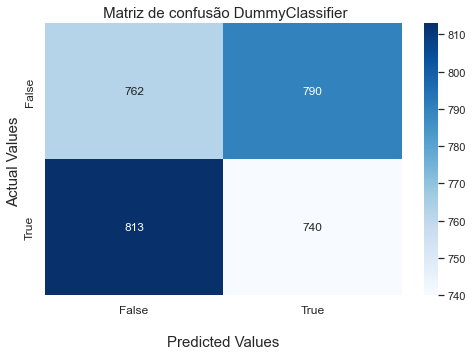

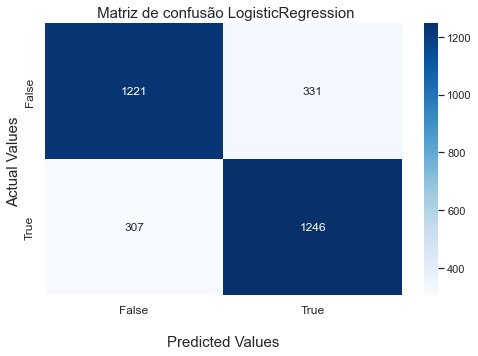

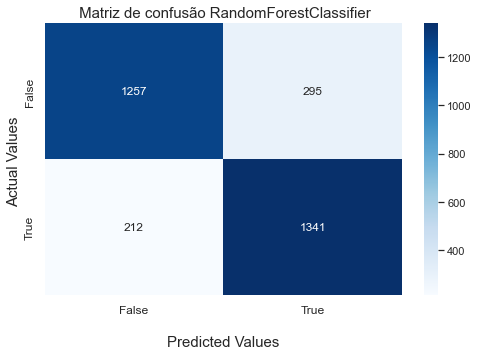

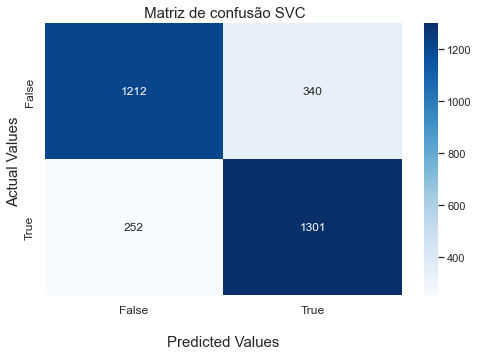

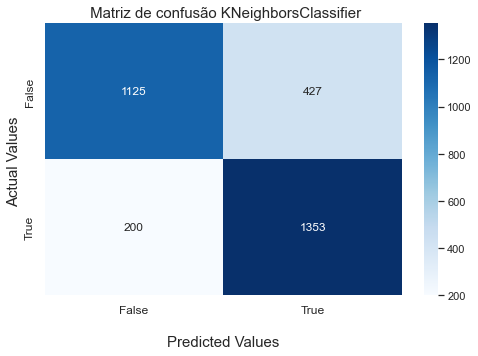

In [29]:
for modelo, y_pred in resultados.items():
    name = modelo.__class__.__name__
    metricas, cm = metricas_modelo(y_test, y_pred)
    df_metricas[name] = metricas
    plotar_matriz_confusao(name, cm)

In [30]:
df_metricas.T.sort_values('Recall', ascending = False)

,Acurácia,Precisão,Recall,F1
KNeighborsClassifier,0.7981,0.7601,0.8712,0.8119
RandomForestClassifier,0.8367,0.8197,0.8635,0.8410
SVC,0.8093,0.7928,0.8377,0.8147
LogisticRegression,0.7945,0.7901,0.8023,0.7962
DummyClassifier,0.4837,0.4837,0.4765,0.4801


As 4 métricas, acurácia, precisão, recall e F1 são derivadas da matriz de confusão que está em cima.

Analisando as métricas como um todo conseguimos saber de forma mais confiavel, qual o melhor modelo.

Explicando um pouco cada métrica:

- **Acurácia:** Valores classificados corretamente pelo modelo / Todos os valores
- **Precisão:** Valores positivo classificados corretamente pelo modelo / Todos os valores positivos reais. 
- **Recall:** Valores positivo classificados corretamente pelo modelo / Todos os valores classificados como positivas pelo modelo. 
- **F1:** É o equilíbrio entre a sensibilidade e a precisão, sendo a média harmônica entre as duas métricas.

Plotando a curva ROC e a AUC

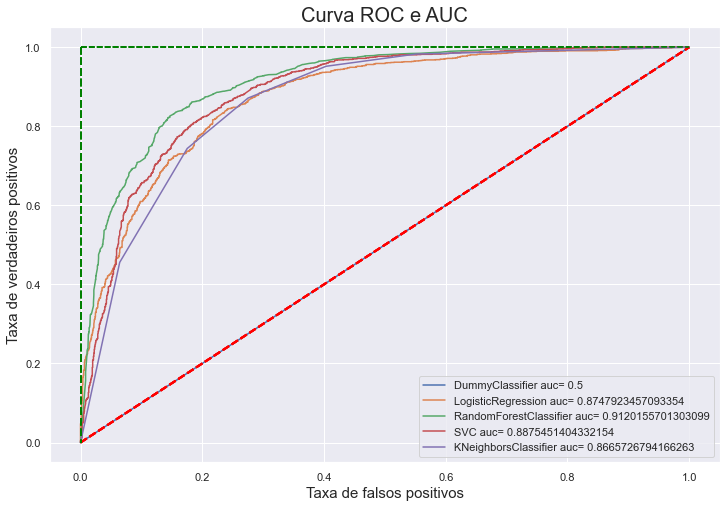

In [31]:
for classifier in classifiers:
    name = classifier.__class__.__name__
    curva_roc(classifier, name, y_test)

A curva ROC traça “Taxa de verdadeiros positivos vs. Taxa de falsos negativos” em diferentes limiares de classificação (limites).

Assim, na tentativa de simplificar a análise da ROC, a AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”. O valor de AUC varia de 0 a 1, sendo que quanto mais próximo de 1 melhor.

Analisando as métricas de validação e a Curva ROC, todos os nossos 4 modelos ficaram acima do modelo de comparação o DummyClassifier.

Dentre esses 4 modelos, o que melhor performou foi o **RandomForestClassifier**. Então seguiremos com esse modelo para testar novos parametros do classificador buscando a melhora do modelo e consequentemente das metricas de validação, da curva ROC e AUC

#### **Melhorando o modelo RandomForestClassifier**

As métricas que iremos testar para buscar a melhorar do modelo são: 

- n_estimators 
- criterion 
- max_features
- max_depth
- min_samples_split
- min_samples_leaf
- bootstrap

In [32]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [33]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [34]:
from sklearn.model_selection import RandomizedSearchCV

new_rf = RandomForestClassifier(random_state=SEED)

In [35]:
random_cv = RandomizedSearchCV(new_rf, param_grid, n_iter=200, cv=3, scoring="recall", n_jobs=-1, verbose = 2,random_state = SEED)

In [36]:
%%time
rcv = random_cv.fit(x, y)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
CPU times: total: 1.73 s
Wall time: 56.4 s


In [37]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.536899,0.008554,0.065159,0.000470,160,4,1,sqrt,7,gini,True,"{'n_estimators': 160, 'min_samples_split': 4, ...",0.705507,0.896172,0.882319,0.827999,0.086799,166
1,0.462097,0.002860,0.057512,0.002488,160,2,2,log2,6,gini,True,"{'n_estimators': 160, 'min_samples_split': 2, ...",0.722899,0.896172,0.862029,0.827033,0.074942,177
2,0.059839,0.001411,0.008976,0.000814,20,6,2,log2,5,gini,True,"{'n_estimators': 20, 'min_samples_split': 6, '...",0.729855,0.876450,0.862029,0.822778,0.065970,196
3,0.390288,0.008239,0.046542,0.001244,160,2,4,auto,3,gini,True,"{'n_estimators': 160, 'min_samples_split': 2, ...",0.776232,0.884571,0.857391,0.839398,0.046023,45
4,0.391287,0.010628,0.049533,0.003292,180,8,4,auto,2,gini,True,"{'n_estimators': 180, 'min_samples_split': 8, ...",0.797101,0.885731,0.862029,0.848287,0.037465,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.373997,0.016825,0.040225,0.001244,80,8,2,auto,9,entropy,False,"{'n_estimators': 80, 'min_samples_split': 8, '...",0.665507,0.926334,0.908406,0.833416,0.118955,89
196,0.175862,0.002351,0.024269,0.002617,60,4,1,auto,5,entropy,False,"{'n_estimators': 60, 'min_samples_split': 4, '...",0.735652,0.884571,0.862029,0.827417,0.065537,176
197,0.377322,0.007567,0.045213,0.001695,100,8,2,auto,8,entropy,False,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.687536,0.914733,0.899130,0.833800,0.103620,84
198,0.220076,0.005421,0.031915,0.004954,80,2,2,log2,5,gini,False,"{'n_estimators': 80, 'min_samples_split': 2, '...",0.740290,0.885151,0.867246,0.830896,0.064484,120


In [38]:
rcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 2,
 'criterion': 'gini',
 'bootstrap': True}

In [39]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.7694041867954912
Precisão: 0.7243967828418231
Recall: 0.8699291693496458
F1: 0.7905207723815096


Não houve melhora nas métricas do modelo alterando os perâmetros, apesar do alto número de interações (200) utilizado no RandomizedSearchCV.

#### **Criação do modelos sem a remoção das colunas realizadas na parte de controle do VIF**

A remoção de colunas pode ter afetado o desempenho do modelo RandomForestClassifier, uma vez que esse tipo de modelo não sofre a multicolinearidade 

Por curiosidades fazer fazer o mesmo processo realizado anteriormente, porém utiliando os dados antes da remoção. Ainda temos que balancea-los e normaliza-los como realizado anteriormente.

In [40]:
dados_original.head()

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,...,Total_servico_dia,Total_servico_mes,Total_gasto,Servico_de_internet_DSL,Servico_de_internet_Fiber optic,Servico_de_internet_Nao,Metodo_de_pagamento_Cartão de crédito automático,Metodo_de_pagamento_Cheque,Metodo_de_pagamento_Cheque eletrônico,Metodo_de_pagamento_Transferência bancária automático
0,0,1,0,1,1,9,1,0,0,1,...,2.19,65.6,593.30,1,0,0,0,1,0,0
1,0,0,0,0,0,9,1,1,0,0,...,2.00,59.9,542.40,1,0,0,0,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,2.46,73.9,280.85,0,1,0,0,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,3.27,98.0,1237.85,0,1,0,0,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,2.80,83.9,267.40,0,1,0,0,1,0,0


In [41]:
x = dados_original.drop('Evasao', axis=1)
y = dados_original['Evasao']

x_resampled, y_resampled = smote.fit_resample(x,y)

dados_balanceados = pd.concat([y_resampled, x_resampled], axis=1)

dados_balanceados['Evasao'].value_counts()

0    5174
1    5174
Name: Evasao, dtype: int64

In [42]:
numericas = ['Tempo_de_contrato', 'Total_servico_dia', 'Total_servico_mes', 'Total_gasto']

for coluna in numericas:

    minimo = dados_balanceados[coluna].min()
    maximo = dados_balanceados[coluna].max()

    dados_balanceados[coluna] = (dados_balanceados[coluna] - minimo)/(maximo-minimo)

dados_balanceados.head()

,Evasao,Genero,Cidadao_Senior,Parceiro,Dependentes,Tempo_de_contrato,Servico_de_telefone,Linhas_multiplas,Segurnaca_online,Backup_online,...,Total_servico_dia,Total_servico_mes,Total_gasto,Servico_de_internet_DSL,Servico_de_internet_Fiber optic,Servico_de_internet_Nao,Metodo_de_pagamento_Cartão de crédito automático,Metodo_de_pagamento_Cheque,Metodo_de_pagamento_Cheque eletrônico,Metodo_de_pagamento_Transferência bancária automático
0,0,1,0,1,1,0.125000,1,0,0,1,...,0.471642,0.471144,0.068315,1,0,0,0,1,0,0
1,0,0,0,0,0,0.125000,1,1,0,0,...,0.414925,0.414428,0.062454,1,0,0,0,1,0,0
2,1,0,0,0,0,0.055556,1,0,0,0,...,0.552239,0.553731,0.032338,0,1,0,0,0,1,0
3,1,0,1,1,0,0.180556,1,0,0,1,...,0.794030,0.793532,0.142531,0,1,0,0,0,1,0
4,1,1,1,1,0,0.041667,1,0,0,0,...,0.653731,0.653234,0.030789,0,1,0,0,1,0,0


In [43]:
x = dados_balanceados.drop(columns = 'Evasao')
y = dados_balanceados['Evasao']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=SEED, stratify = y)

In [44]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

dummy = DummyClassifier(random_state = SEED, strategy="uniform")
lr = LogisticRegression(max_iter = 1000, random_state = SEED)
rf = RandomForestClassifier(random_state = SEED)
svc = SVC(random_state = SEED, probability = True)
knc = KNeighborsClassifier()

classifiers = [dummy, lr, rf, svc, knc]

In [45]:
resultados = {}

for classifier in classifiers:
    y_pred = executa_modelo(classifier, x_train, x_test, y_train)
    resultados[classifier] = y_pred

resultados

{DummyClassifier(random_state=20, strategy='uniform'): array([1, 0, 1, ..., 1, 0, 0], dtype=int64),
 LogisticRegression(max_iter=1000, random_state=20): array([0, 1, 1, ..., 1, 1, 1], dtype=int64),
 RandomForestClassifier(random_state=20): array([0, 1, 1, ..., 1, 1, 1], dtype=int64),
 SVC(probability=True, random_state=20): array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 KNeighborsClassifier(): array([0, 0, 1, ..., 1, 1, 1], dtype=int64)}

In [46]:
index = ['Acurácia', 'Precisão', 'Recall', 'F1']
df_metricas_1 = pd.DataFrame(index = index)   

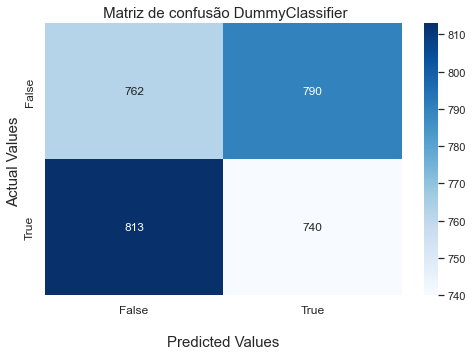

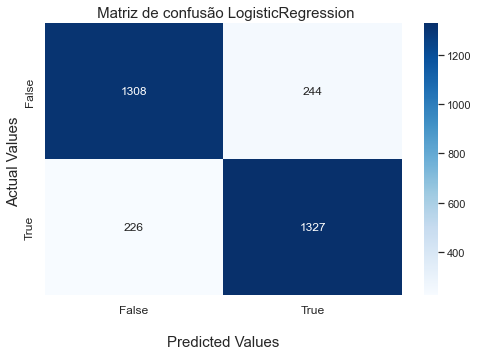

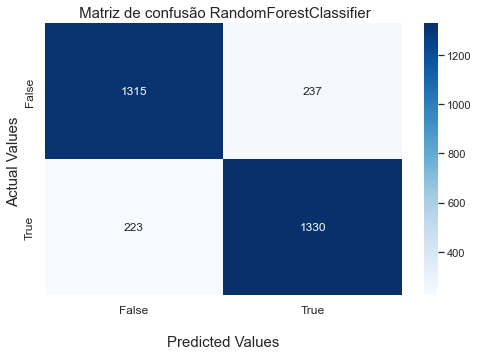

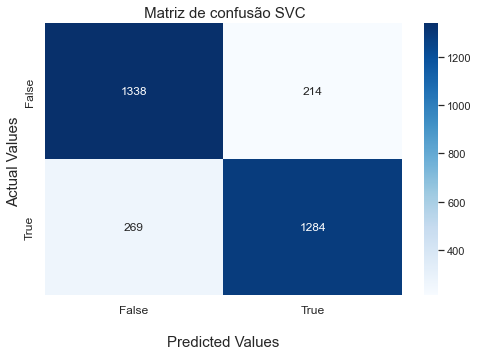

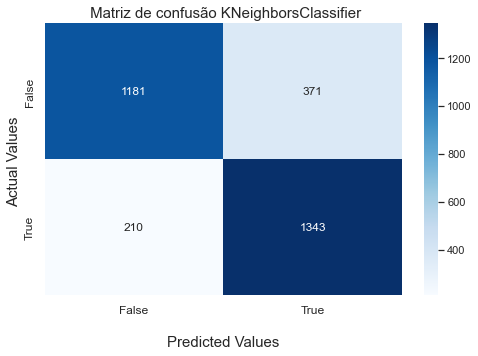

In [47]:
for modelo, y_pred in resultados.items():
    name = modelo.__class__.__name__
    metricas, cm = metricas_modelo(y_test, y_pred)
    df_metricas_1[name] = metricas
    plotar_matriz_confusao(name, cm)

In [ ]:
for classifier in classifiers:
    name = classifier.__class__.__name__
    curva_roc(classifier, name, y_test)

In [48]:
df_metricas_1.T.sort_values('Recall', ascending = False)

,Acurácia,Precisão,Recall,F1
KNeighborsClassifier,0.8129,0.7835,0.8648,0.8222
RandomForestClassifier,0.8519,0.8488,0.8564,0.8526
LogisticRegression,0.8486,0.8447,0.8545,0.8496
SVC,0.8444,0.8571,0.8268,0.8417
DummyClassifier,0.4837,0.4837,0.4765,0.4801


In [49]:
df_metricas.T.sort_values('Recall', ascending = False)

,Acurácia,Precisão,Recall,F1
KNeighborsClassifier,0.7981,0.7601,0.8712,0.8119
RandomForestClassifier,0.8367,0.8197,0.8635,0.8410
SVC,0.8093,0.7928,0.8377,0.8147
LogisticRegression,0.7945,0.7901,0.8023,0.7962
DummyClassifier,0.4837,0.4837,0.4765,0.4801


Como podemos perceber todos os modelos apresentaram melhoras não removendo as colunas do DataFrame. Uma pesquisa mais a fundo seria necessáiro para entender o motivo pelo qual o VIF não afetou os modelos de regressão

#### **Análise da importância das features **

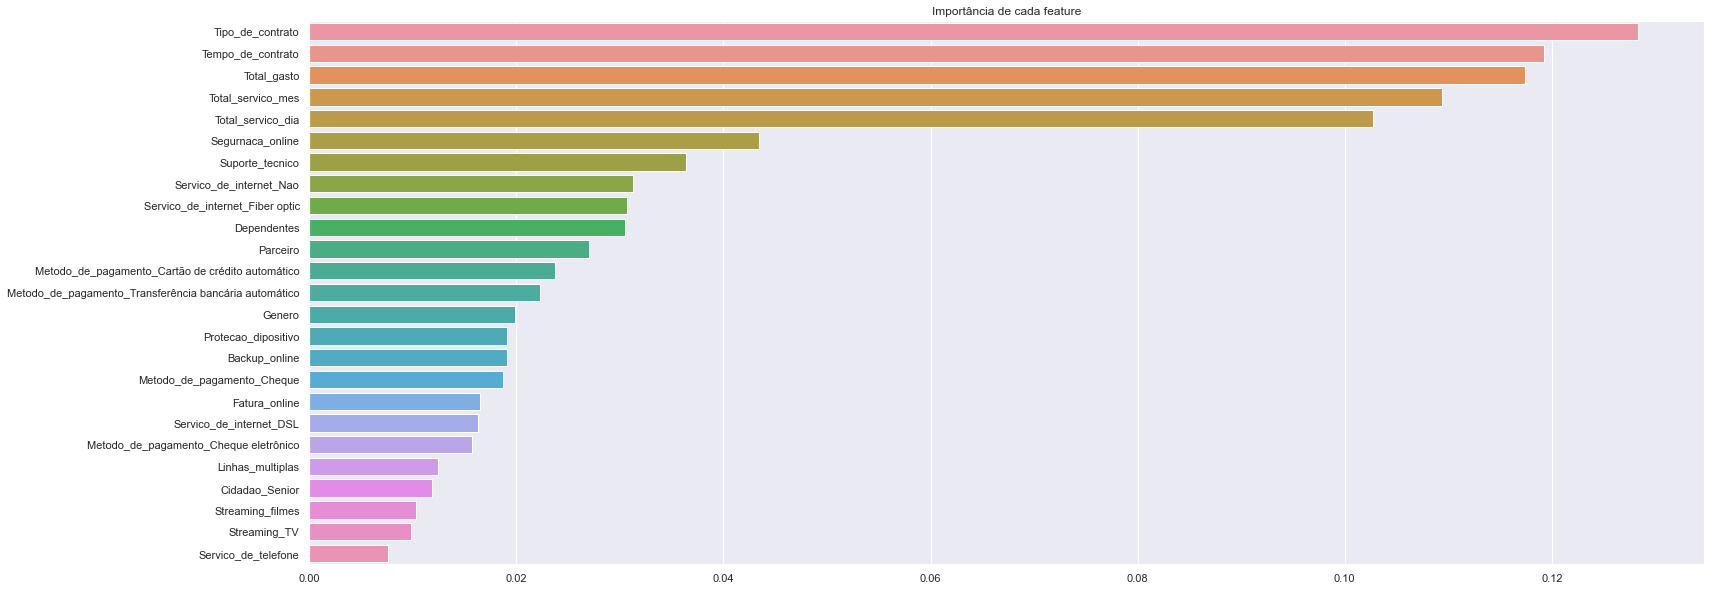

In [60]:
importances = pd.Series(data=rf.feature_importances_, index=x.columns).sort_values(ascending=False)

sns.set(rc = {'figure.figsize':(25,10)})
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')
plt.show()

## **Consideraçãoes finais:**

O modelo que apresentou o melhor resultado geral foi o RandomForest. Ele preve com uma média de 85% todas as métricas de validação. Isso pode ajudar a empresa nesse momento, enquanto ela também procura ações para melhorar seus serviços de internet e manter clientes com menor tempo de contrato.

No entanto ainda é necessário entender melhor o comportamento dos algoritimos de otimização dos modelos de machine learning para entender o motivo de não ter havido melhora significativa para as métricas analisadas, quando houve a remoção de colunas para evitar a multicolinearidade.